<a href="https://colab.research.google.com/github/rafaelnduarte/Turnover_Reduction_Machine_Learning/blob/master/Reducing_Employee_Turnover_With_Machine_Learning_Logistic_Regression%2C_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reducing Employee Turnnover With Machine Learning

[![LinkedIn](https://img.shields.io/badge/LinkedIn-rafaelnduarte-blue.svg)](https://www.linkedin.com/in/rafael-n-duarte)
[![GitHub](https://img.shields.io/badge/GitHub-rafaelnduarte-purple.svg)](https://github.com/rafaelnduarte)

As the volume of data created daily increases, it's vital for companies to know how to collect and use their data, in a way that can bring them competitive advantages.

There are many ways companies can benefit from Data Science. [Recommendation Systems]('https://towardsdatascience.com/recommender-systems-in-practice-cef9033bb23a'), for example, can be very useful. but even in e-commerce, it's important to understand and take care of your employees.

<center><img alt="Recursos Humanos" width="60%" src="https://image.freepik.com/free-vector/job-applicants-interviewers-collection_1284-26227.jpg
"></center>


> With that in mind, the goal of this project is to analyze the data available and look for ways to **Reduce Employee Turnover**, increasing retention of good professionals.

Using data collected from [Kaggle]('https://kaggle.com/'), we'll build a Machine Learning model that's capable of predicting attrition among employees, which can help companies take prevention actions to minimize attrition effects, increase employee quality of life, and retain the best professionals of the company.

In [0]:
#@title
# hide warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# installing scikit-plot
!pip install -q scikit-plot

In [0]:
# importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# importing Machine Learning resources
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Obtaining the data
The data used in this project was created and made available by [IBM]('https://www.ibm.com/br-pt') Data Scientists, on [Kaggle]('https://kaggle.com/').

In [0]:
# importing the data
df_ibm = pd.read_csv('https://raw.githubusercontent.com/rafaelnduarte/Data_Science_For_HR/master/data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

## Variable Dictionary

* Education 
  * 1 'Below College'
  * 2 'College'
  * 3 'Bachelor'
  * 4 'Master'
  * 5 'Doctor'

* EnvironmentSatisfaction
  * 1 'Low'
  * 2 'Medium'
  * 3 'High'
  * 4 'Very High'

* JobInvolvement
  * 1 'Low'
  * 2 'Medium'
  * 3 'High'
  * 4 'Very High'

* JobSatisfaction
  * 1 'Low'
  * 2 'Medium'
  * 3 'High'
  * 4 'Very High'

* PerformanceRating
  * 1 'Low'
  * 2 'Good'
  * 3 'Excellent'
  * 4 'Outstanding'

* RelationshipSatisfaction
  * 1 'Low'
  * 2 'Medium'
  * 3 'High'
  * 4 'Very High'

* WorkLifeBalance
  * 1 'Bad'
  * 2 'Good'
  * 3 'Better'
  * 4 'Best'

In [0]:
# checking first entries
df_ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [0]:
# checking info on the dataset
print("--- Information On The Dataset ---")
print("Variables:\t {}".format(df_ibm.shape[1]))
print("Entries:\t {}\n".format(df_ibm.shape[0]))
print("The Dataset Doesn't Have Missing Values. \n")

# identificando os tipos das variáveis
display(df_ibm.info())

--- Information On The Dataset ---
Variables:	 35
Entries:	 1470

The Dataset Doesn't Have Missing Values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfa

None

In [0]:
# statistical distribution of the variables
df_ibm.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Insights

Some basic information can be withdrawn from this statistical distribution visualization:

* The average age across the company is almost 37 years old.
* Most employees have a College level education.
* Since we're talking about an American dataset, we're assuming that income values are in US Dollars. That means that the average monthly income in the company is US$6502.93.

In [0]:
# distribution of categorical features
df_ibm.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


### Insights

`Attrition` indicates whether an employee has presented attrition or not in the workplace. We'll use it as our target variable. In our dataset, this would be the most relevant feature for turnover, and that's why we'll focus on it.

Having access to more data, we could use and/or create new features that could better represent the chances of an employee leaving the company.

* Most employees haven't presented attrition.
* Research & Development is the department with the greater number of employees.
* Men are the majority in the company.
* The most common job in the company is Sales Executive.
* Most employees are married.
* Most employees don't work overtime.

## Gender Equality

<center><img alt="Gender Equality" width="60%" src="https://image.freepik.com/free-photo/colorful-equal-rights-symbols-concept_23-2148415323.jpg
"></center>

It's very important to be aware of themes like Gender Equality. It's an important cause that must be taken seriously. Making efforts to reduce inequality between men and women is an absolute must.

Having access to income and education data on the employees, it's possible to check how the genders compare.

In [0]:
# education level by gender
df_ibm.groupby(['Gender']).Education.value_counts(ascending=False)[:20]

Gender  Education
Female  3            235
        4            154
        2            117
        1             60
        5             22
Male    3            337
        4            244
        2            165
        1            110
        5             26
Name: Education, dtype: int64

In [0]:
# statistical distribution of education by gender
df_ibm.groupby(['Gender']).Education.describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,588.0,2.933673,1.007986,1.0,2.0,3.0,4.0,5.0
Male,882.0,2.899093,1.035148,1.0,2.0,3.0,4.0,5.0


In [0]:
# statistical distribution of monthly income by gender
df_ibm.groupby(['Gender']).MonthlyIncome.describe()


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,588.0,6686.566327,4695.608507,1129.0,3037.0,5081.5,8711.75,19973.0
Male,882.0,6380.507937,4714.856577,1009.0,2819.5,4837.5,8113.75,19999.0


### Insights
* This company pays better salaries to women than men, on average and in all percentiles, except for the top value.
* Women also present a higher educational level than men, on average, which reflects on their salaries.

### Target Variable

To make sure we can better understand and operate on our target variable, we have to transform it to numerics. We'll do that with the function below:

In [0]:
# encoding target variable
target_map = {'Yes':1, 'No':0}
# creating a column with the target variable converted to numerics
df_ibm["Attrition_numerical"] = df_ibm["Attrition"].apply(lambda x: target_map[x])

In [0]:
# checking the new column
df_ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0


## Density Graph

Density Graphs are powerful visual tools that can help us get valuable insights.

Our main goal here is to analyze distributions between the two classes of our classification problem (Attrition = 0 or 1).

Analyzing the differences in the distributions for each class, we can identify some of the variables that are more important to our problem.

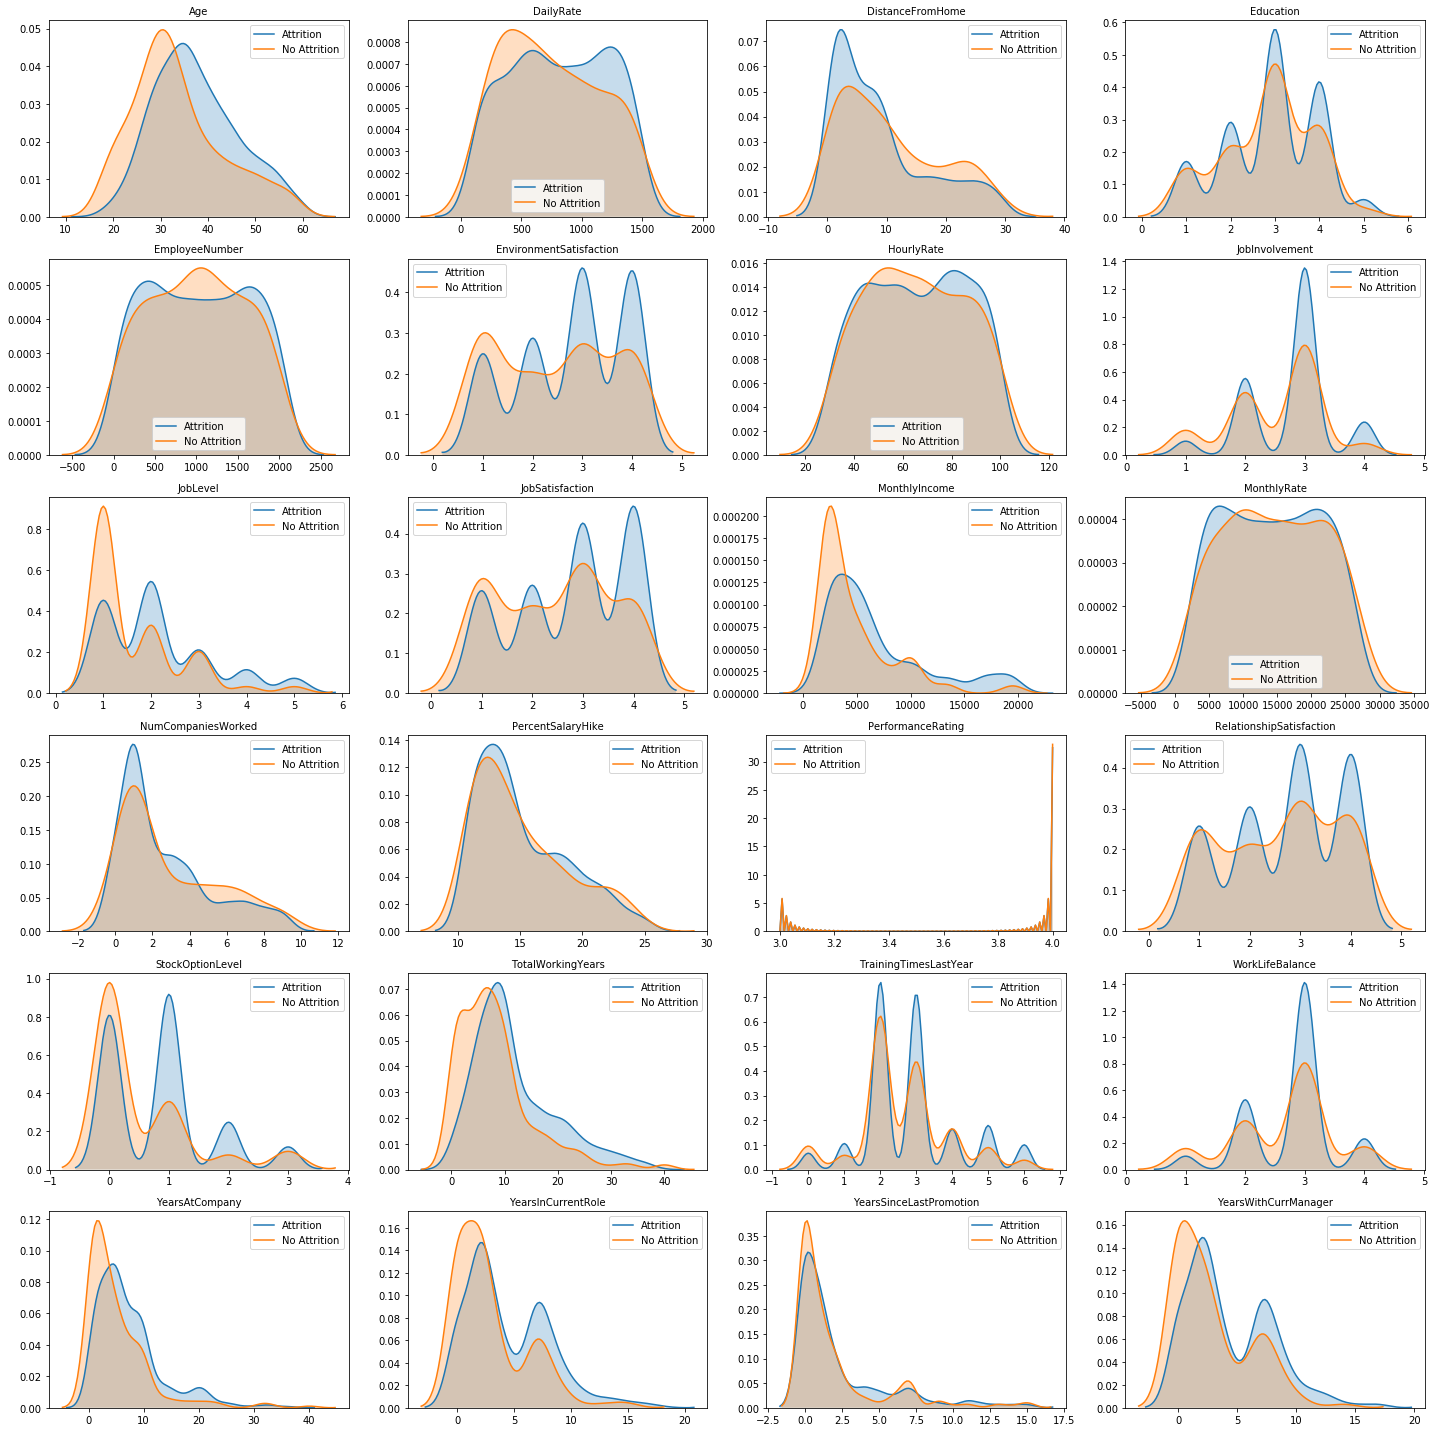

In [0]:
# plotando gráfico de densidade
colunas = df_ibm.drop(['Attrition', 'BusinessTravel', 'Department',
                       'EducationField', 'Gender', 'JobRole', 'MaritalStatus',
                       'Over18', 'OverTime','EmployeeCount', 'StandardHours', 'Attrition_numerical'], axis=1).columns
num_plots = len(colunas)
df_class_0 = df_ibm[df_ibm.Attrition_numerical == 0]
df_class_1 = df_ibm[df_ibm.Attrition_numerical == 1]

fig, ax = plt.subplots(nrows=6, ncols=4, figsize=(20,20))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in colunas:
    idx += 1
    plt.subplot(6, 4, idx)
    sns.kdeplot(df_class_0[col], label="Attrition", shade=True)
    sns.kdeplot(df_class_1[col], label="No Attrition", shade=True)
    plt.title(col, fontsize=10)
plt.savefig('dist_en.png')
plt.tight_layout()


### Insights on Density Graphs

As stated before, Density Graphs are interesting tools for analyzing distribution between classes.

> The distribution presented in Yellow represents employees with Attrition and Blue, for employees that haven't experienced Attrition.

What we're looking for here are differences between the distributions to find key points for predicting employee attrition.

In general, the distributions are quite similar, not presenting huge differences. Thus, I'll analyze only the features that do differ.


* The distribution of `Age` leads to believe that younger employees have stronger tendencies for attrition.
* When it comes to `DistanceFromHome`, we can notice that the bigger the distance, more likely the employee is to have attrition.
* `JobInvolvement` shows us that less involved employees tend to have more attrition.
* `JobLevel` shows that lower-level employees tend to be more likely to have attrition. The same is true for `JobSatisfaction` and `MonthlyIncome`.
* `StockOptionLevel` and `TotalWorkingYears` also show a decrease in attrition level as the values increase.
* `YearsAtCompany`, `YearsInCurrentRole`, `YearsSinceLastPromotion`, `YearsWithCurrManager` show more attrition in the early years, and an evolution as time goes by. This can suggest adaptation problems, since the shorter the period, more likely the attrition.

0    1233
1     237
Name: Attrition_numerical, dtype: int64

Attritions Represent 16.12% Do Dataset.



[]

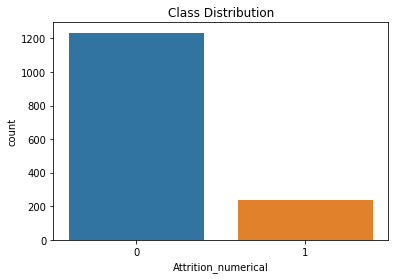

In [0]:
# checking distribution of target variable
print(df_ibm.Attrition_numerical.value_counts())
print("\nAttritions Represent {:.2f}% Do Dataset.\n".format((df_ibm[df_ibm.Attrition_numerical == 1].shape[0] / df_ibm.shape[0]) * 100))

# plotting bar graph
fig, ax = plt.subplots()

sns.countplot('Attrition_numerical', data=df_ibm, ax=ax)
ax.set_title('Class Distribution')
plt.savefig('imbalanced_dist.png')
plt.plot()

#### Conclusions

This means that 237 (roughly 16%) of the 1470 employees listed in this dataset have shown attrition.

This can be an acceptable number, depending on company indicators, but for our Machine Learning model, it's not ideal. We'll balance our dataset so we can fit it in our model later.

## Preparing The Data Machine Learning

To fit our data in a Machine Learning model we have to work on it. When preprocessing our data, we'll go through two different steps:

* Transformation of categorical features: We'll use **Label Encoder**, which transforms Strings into numbers representing categories.

* Transformation of numerical features: Using **MinMaxScaler**. To put it simply, MinMaxScaler orders the number on a scale from 0 to 1. This process also helps with outliers, hence why we didn't deal with them before.

In [0]:
# checking the dataset
df_ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0


In [0]:
# creating a copy of the dataset
df_minmax = df_ibm.copy()

# removing unnecessary columns
df_minmax.drop(['Attrition', 'Over18'], axis=1, inplace=True)

df_minmax.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,80,1,6,3,3,2,2,2,2,0


#### Categorical Features
Transformation of Categorical Features usgin **Label Encoder**.

In [0]:
# instantiating the encoder
le = LabelEncoder()

# encoding categorical features
df_minmax['BusinessTravel'] = le.fit_transform(df_minmax['BusinessTravel'])
df_minmax['Department'] = le.fit_transform(df_minmax['Department'])
df_minmax['EducationField'] = le.fit_transform(df_minmax['EducationField'])
df_minmax['Gender'] = le.fit_transform(df_minmax['Gender'])
df_minmax['JobRole'] = le.fit_transform(df_minmax['JobRole'])
df_minmax['MaritalStatus'] = le.fit_transform(df_minmax['MaritalStatus'])
df_minmax['OverTime'] = le.fit_transform(df_minmax['OverTime'])

# checking the result
df_minmax.head()


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,80,1,6,3,3,2,2,2,2,0


#### Numerical Features
Transfomration of Numerical Features using **MinMaxScaler**.

In [0]:
# MinMaxScaler
scaler = MinMaxScaler()
df_minmax[['Age']] = scaler.fit_transform(df_minmax[['Age']])
df_minmax[['DailyRate']] = scaler.fit_transform(df_minmax[['DailyRate']])
df_minmax[['EmployeeCount']] = scaler.fit_transform(df_minmax[['EmployeeCount']])
df_minmax[['EmployeeNumber']] = scaler.fit_transform(df_minmax[['EmployeeNumber']])
df_minmax[['HourlyRate']] = scaler.fit_transform(df_minmax[['HourlyRate']])
df_minmax[['MonthlyIncome']] = scaler.fit_transform(df_minmax[['MonthlyIncome']])
df_minmax[['MonthlyRate']] = scaler.fit_transform(df_minmax[['MonthlyRate']])
df_minmax[['NumCompaniesWorked']] = scaler.fit_transform(df_minmax[['NumCompaniesWorked']])
df_minmax[['PercentSalaryHike']] = scaler.fit_transform(df_minmax[['PercentSalaryHike']])
df_minmax[['StandardHours']] = scaler.fit_transform(df_minmax[['StandardHours']])
df_minmax[['TotalWorkingYears']] = scaler.fit_transform(df_minmax[['TotalWorkingYears']])
df_minmax[['TrainingTimesLastYear']] = scaler.fit_transform(df_minmax[['TrainingTimesLastYear']])
df_minmax[['YearsAtCompany']] = scaler.fit_transform(df_minmax[['YearsAtCompany']])
df_minmax[['YearsInCurrentRole']] = scaler.fit_transform(df_minmax[['YearsInCurrentRole']])
df_minmax[['YearsSinceLastPromotion']] = scaler.fit_transform(df_minmax[['YearsSinceLastPromotion']])
df_minmax[['YearsWithCurrManager']] = scaler.fit_transform(df_minmax[['YearsWithCurrManager']])

# checking results
df_minmax.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,0.547619,2,0.715820,2,1,2,1,0.0,0.000000,2,0,0.914286,3,2,7,4,2,0.262454,0.698053,0.888889,1,0.000000,3,1,0.0,0,0.200,0.0,1,0.15,0.222222,0.000000,0.294118,1
1,0.738095,1,0.126700,1,8,1,1,0.0,0.000484,3,1,0.442857,2,2,6,2,1,0.217009,0.916001,0.111111,0,0.857143,4,4,0.0,1,0.250,0.5,3,0.25,0.388889,0.066667,0.411765,0
2,0.452381,2,0.909807,1,2,2,4,0.0,0.001451,4,1,0.885714,2,1,2,3,2,0.056925,0.012126,0.666667,1,0.285714,3,2,0.0,0,0.175,0.5,3,0.00,0.000000,0.000000,0.000000,1
3,0.357143,1,0.923407,1,3,4,1,0.0,0.001935,4,0,0.371429,3,1,6,3,1,0.100053,0.845814,0.111111,1,0.000000,3,3,0.0,0,0.200,0.5,3,0.20,0.388889,0.200000,0.000000,0
4,0.214286,2,0.350036,1,2,1,3,0.0,0.002903,1,1,0.142857,3,1,2,2,1,0.129489,0.583738,1.000000,0,0.071429,3,4,0.0,1,0.150,0.5,3,0.05,0.111111,0.133333,0.117647,0


### Splitting The Dataset Between Train And Test
In order to make predictions, we need to separate our dataset into Train and Test.

As the names suggest, this will allow us to train our model, and then test it with new data, so we can evaluate how effective it is.

In [0]:
# splitting the dataset
X = df_minmax.drop('Attrition_numerical', axis=1)
y = df_ibm['Attrition_numerical']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

### Balancing The Data

We have already seen that most employees haven't experienced attrition.
That means our dataset is **imbalanced**, and needs to be treated for the sake of the performance of our model.

For that, we'll use `RandomUnderSampler`, to preserve the minoritary class, `Attrition`.

1    178
0    178
dtype: int64


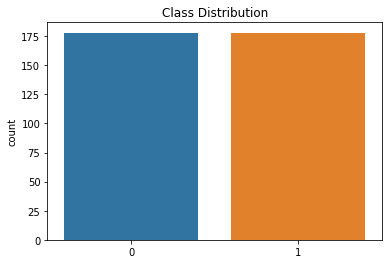

In [0]:
# applying UnderSampler
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# checking class balance
print(pd.Series(y_rus).value_counts())

# plotting new class distribution
fig, ax = plt.subplots()
sns.countplot(y_rus);
ax.set_title('Class Distribution')
plt.savefig('balanced_classes.png')

## Machine Learning

Now that we better understand our data and the reality of the company, and have our data clean and prepared, it's time to use Machine Learning to make predictions that can help us with the prevention of attrition/conflict within the company, and, consequently, reduce turnover.

<center><img alt='AI' width='30%'src="https://image.freepik.com/free-vector/abstract-artificial-intelligence-background_23-2147738874.jpg"></center>

For that, we'll use two different Machine Learning Algorithms: 

>* Logistic Regression
* Random Forest

### Regressão Logística
To better understand the theory behind Logistic Regression, visit [Towards Data Science](https://towardsdatascience.com/logistic-regression-explained-9ee73cede081). However, to put it simply, I'm going to quote them on the difference between Linear and Logistic Regression.

> "*In Logistic Regression, we don’t directly fit a straight line to our data like in linear regression. Instead, we fit a S shaped curve, called Sigmoid, to our observations..*"

<center><img alt='AI' width='60%'src="https://estatsite.files.wordpress.com/2018/08/linear_vs_logistic_regression.jpg?w=940"></center>



### Baseline With Imbalanced Data

Since we're working on a project that exists in a vacuum, that is, without previous context ou parameters previously used by a company, we need to create our own baseline, which is an acceptable threshold of success, that will serve as a reference for future improvements.

In this case, I'll use a Logistic Regression model, trained with our imbalanced data. That will be an important reference, from which we can conclude whether it was worth it balancing our data or not.


In [0]:
# creating a copy of our imbalanced dataset
df_desbalanceado = df_minmax.copy()

# splitting the dataset in X and y
desb_X = df_desbalanceado.drop('Attrition_numerical', axis=1)
desb_y = df_desbalanceado['Attrition_numerical']

# splitting the dataset
desb_X_train, desb_X_test, desb_y_train, desb_y_test = train_test_split(desb_X, desb_y, stratify=y, shuffle=True)

In [0]:
# instantiating and training a Logistic Regression Model
np.random.seed(2)
desb_model = LogisticRegression()
desb_model.fit(desb_X_train, desb_y_train)

# making predictions
desb_y_pred = desb_model.predict(desb_X_test)
desb_y_proba = desb_model.predict_proba(desb_X_test)

Classification Report:
               precision    recall  f1-score   support

           0     0.8912    0.9547    0.9219       309
           1     0.6216    0.3898    0.4792        59

    accuracy                         0.8641       368
   macro avg     0.7564    0.6723    0.7005       368
weighted avg     0.8480    0.8641    0.8509       368

Accuracy: 0.8641

AUC: 0.6723



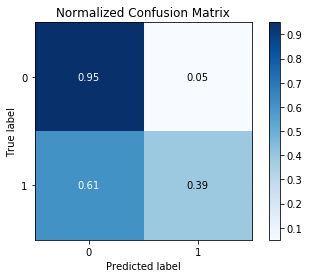

In [0]:
# plotting a confusion matrix
skplt.metrics.plot_confusion_matrix(desb_y_test, desb_y_pred, normalize=True)

# printing a classification report
print("Classification Report:\n", classification_report(desb_y_test, desb_y_pred, digits=4))

# priting accuracy
print("Accuracy: {:.4f}\n".format(accuracy_score(desb_y_test, desb_y_pred)))

# printing AUC
print("AUC: {:.4f}\n".format(roc_auc_score(desb_y_test, desb_y_pred)))

### Conclusions
Analyzing the Confusion Matrix, we can see that we had too many False Positives, which is a problem.

* Despite having an accuracy of about 87%, that's not all we're looking for in a model, and our False Positives make that clear.
* Our AUC was 0.6291, which means we have plenty of room for improvement. To better understand ROC_AUC, check [this article](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5?gi=47a7f19e8b78). To make it simple, for the sake of this project, we only need to understand that the higher our AUC score, the better.

### Balanced Data

Now that we have a baseline to improve upon, it's time to work with our carefully treated data, and find ways to have better results.

In [0]:
# instantiating and training a Logistic Regression Model
np.random.seed(2)
model = LogisticRegression()
model.fit(X_rus, y_rus)

# making predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

Classification Report:
               precision    recall  f1-score   support

           0     0.9325    0.7152    0.8095       309
           1     0.3282    0.7288    0.4526        59

    accuracy                         0.7174       368
   macro avg     0.6304    0.7220    0.6311       368
weighted avg     0.8356    0.7174    0.7523       368

Accuracy: 0.7174

AUC: 0.7220



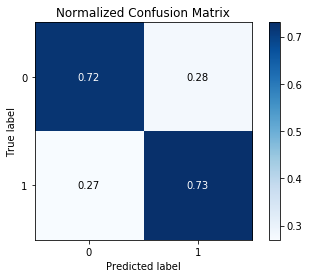

In [0]:
# confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# classification report
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

# accuracy
print("Accuracy: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# AUC
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

### Conclusions - Balanced Data

Here, we can see that the results with balanced data were better.

* Despite having a worse accuracy score, our AUC improved, which is good.
* However, we're still getting high number on False Negatives and especially False Positives.

Anyhow, we've already beaten our baseline, which in itself is a step in the right direction.

### Random Forest

As stated before, we're also going to use **Random Forest** to classify our employees. Let's see how it compares to the previous model.

<center><img alt='Random Forest' width='60%'src="https://cdn-cms.f-static.net/uploads/892738/2000_5b61d8595accd.jpg"></center>

As the name suggests, Random Forest is a Tree-Based algorithm, that uses a large number of Decision Trees (Forest) at random. After iterating over the trees, it yields the most common results of the trees.

Let's see how it does.

In [0]:
# creating and training the model
seed = 0
rf = RandomForestClassifier(n_jobs = -1,
                            n_estimators= 1000,
                            max_features= 0.3,
                            max_depth= 3,
                            min_samples_leaf= 3,
                            random_state= seed, verbose= 0)
rf.fit(X_rus, y_rus)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features=0.3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Classification Report:
               precision    recall  f1-score   support

           0     0.9095    0.7152    0.8007       309
           1     0.2960    0.6271    0.4022        59

    accuracy                         0.7011       368
   macro avg     0.6027    0.6712    0.6014       368
weighted avg     0.8111    0.7011    0.7368       368

Accuracy:	 0.7011

ROC_AUC:	 0.6712



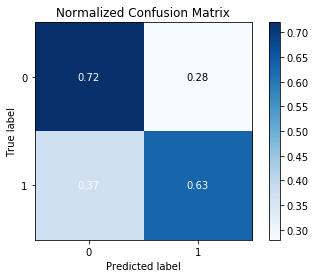

In [0]:
# making predictions
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)

# Classification Report
print('Classification Report:\n', classification_report(y_test, y_pred, digits=4))

# Accuracy
print('Accuracy:\t {:.4f}\n'.format(accuracy_score(y_test, y_pred)))

# AUC
print('ROC_AUC:\t {:.4f}\n'.format(roc_auc_score(y_test, y_pred)))

# confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True);

### More Important Variables
Another important verification we can make is **Feature Importance**, checking what features were more important for the decisions of our model.

In [0]:
# calculating feature importance
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.reset_index(inplace=True)
feature_importances.rename(columns={"index": "features"}, inplace=True)

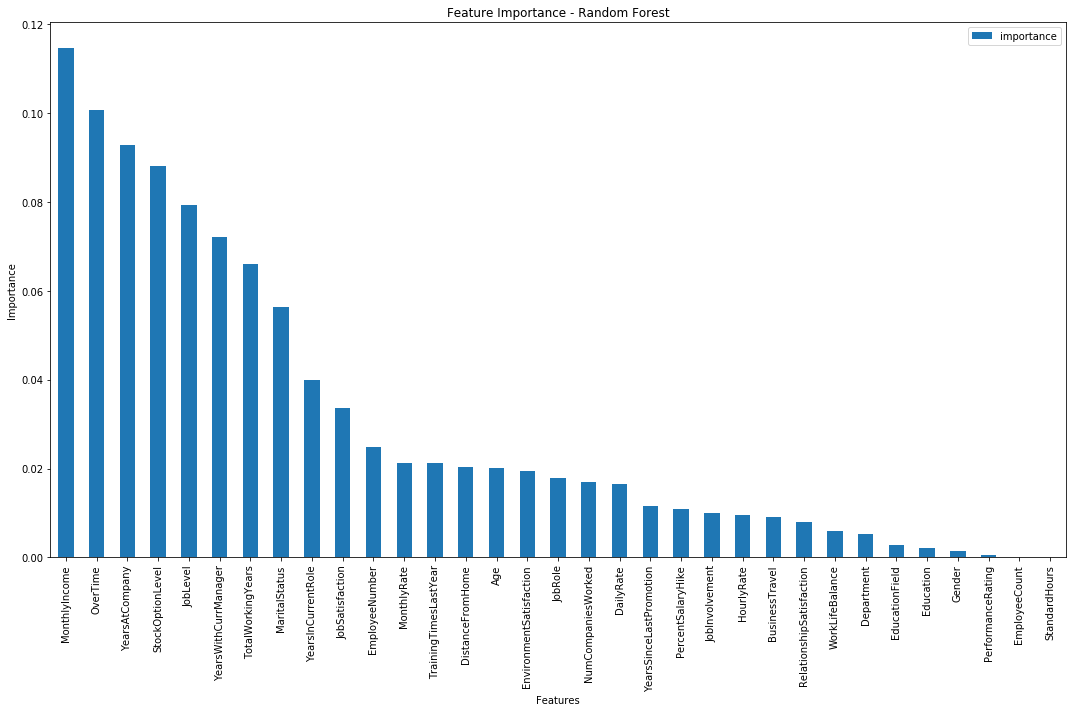

In [0]:
# plotting a bar graph to show most features by importance
fig, ax = plt.subplots(figsize=(15,10))

feature_importances.plot(x="features", y="importance", kind="bar", ax=ax)

ax.set_title("Feature Importance - Random Forest")
ax.set_xlabel("Features")
ax.set_ylabel("Importance")

plt.savefig("feat_imp.png")
plt.tight_layout()

## Conclusions - Random Forest
The Random Forest model did slightly better than Logistic Regression.

Even though it's not a big improvement, with proper tuning, both models can be improved.

However, the most important variables are extremely valuable, since they can give us insights on the most critical points of attrition, and, with that information, the company can act before the attrition even happens.

Among the most important variables, I'd like to highlight:
* OverTime is definitely the most important variable.
* MonthlyIncome
* StockOptionLevel
* Age
* JobLevel
* TotalWorkingYears

We can identify many variables related to career, benefits, and workload. High levels of stress? Feeling of underappreciation? These are only hypotheses. Only a deeper analysis with more context of the company and the employees can tell us for sure.

# Conclusions

Data Science is a growing field, with much to be explored and improved. In this project, the goal was to present some kind of MVP for the Human Resources department.

Without a doubt, having access to more data, collaborating with other teams in the company, a greater understanding of the context of the company and optimization of the presented models alongside the implementation of others, the results can be a lot better.

Anyway, I hope to have provided interesting insights, and a valuable project. Should you have any comments, questions or suggestions, don't hesitate to contact me on [LinkedIn](https://www.linkedin.com/in/rafael-n-duarte/), and check out my other projects on [GitHub](https://github.com/rafaelnduarte).

## Thank You!
<center><img width = '80%'src= "https://github.com/rafaelnduarte/Portfolio/blob/master/rafaelnd_banner.png?raw=true"></center>